
#**Iris Flowers Classification :**
#**Predict the different species of flowers on the length of there petals and sepals**

# Implementing using K-Nearest Neighbors Algorithm (Classification)

 1) Create a K-NN model from scratch

 2) Use sklearn to implement K-NN

 3) Use sklearn to implement K-NN; use GridSearchCV and RandomizedSearchCV to select hyper-parameters

 4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

## 1) Create a K-NN model from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/iris_dataset.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


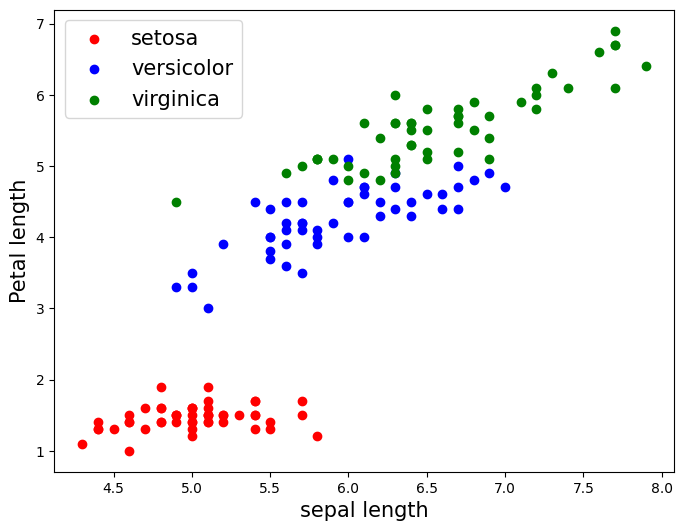

In [4]:
df1 = df[df.species=="setosa"]
df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.figure(figsize = (8, 6))

plt.scatter(df1.sepal_length, df1.petal_length, color="red", label ="setosa")
plt.scatter(df2.sepal_length, df2.petal_length, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.petal_length, color="green", label="virginica")
plt.xlabel("sepal length", fontsize=15)
plt.ylabel("Petal length", fontsize=15)
plt.legend(fontsize=15);

In [5]:
X = df[["sepal_length", "sepal_width"]].to_numpy()

y = df["species"].to_numpy()

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [7]:
X_train.shape

(90, 2)

In [8]:
X_valid.shape

(30, 2)

In [9]:
X_test.shape

(30, 2)

In [10]:
# Defining Euclidean distance function

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between X_train[0] and X_train[1] is {distance(X_train[0], X_train[1])}")

The distance between X_train[0] and X_train[1] is 3.026549190084311


In [11]:
# defining a function that will create a list of k nearest neighbors from the training data set to a given test point
# For each such neighbor, this list will store: features of that neighbor, its label, and its distance to the test point

def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                        k):

    neighbors = []

    for p, l in zip(training_features, training_labels):
        d = distance(point, p)
        info = [p, l, d]
        neighbors.append(info)

    neighbors.sort(key = lambda x : x[-1])

    return neighbors[:k]

In [12]:
# Check the k_nearest_neighbors function for a test data point

k_nearest_neighbors(X_test[3], X_train, y_train, 7)

[[array([6.1, 2.9]), 'versicolor', 0.09999999999999964],
 [array([6.1, 3. ]), 'versicolor', 0.1414213562373093],
 [array([5.9, 3. ]), 'virginica', 0.1414213562373093],
 [array([6.1, 2.8]), 'versicolor', 0.1414213562373093],
 [array([5.9, 3. ]), 'versicolor', 0.1414213562373093],
 [array([6.2, 2.9]), 'versicolor', 0.20000000000000018],
 [array([5.8, 2.8]), 'virginica', 0.22360679774997916]]

In [13]:
y_test[3]

'versicolor'

In [14]:
def knn_predict(point,
                training_features,
                training_labels,
                k,
                regression = False):

    neighbors = k_nearest_neighbors(point,
                                    training_features,
                                    training_labels,
                                    k)

    labels = [x[1] for x in neighbors]

    if regression == False:
        return max(labels, key = labels.count)
    else:
        return sum(x[1] for x in labels)/k

In [15]:
labels = ['setosa', 'setosa', 'virginica', 'setosa', 'virginica']
max(labels, key = labels.count)

'setosa'

In [16]:
# Check this function

knn_predict(X_test[3], X_train, y_train, 7)

'versicolor'

In [17]:
def accuracy(test_features,
             test_labels,
             training_features,
             training_labels,
             k):

    correct = 0
    for point, label in zip(test_features, test_labels):
        correct += label == knn_predict(point,
                                        training_features,
                                        training_labels,
                                        k)
    return correct/len(test_features)

In [18]:
# Check this function

accuracy(X_valid, y_valid, X_train, y_train, 15)

0.8

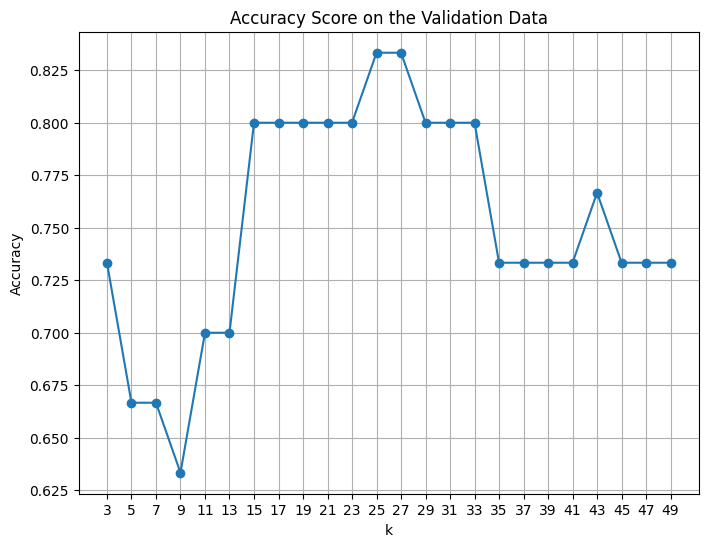

In [19]:
k_values = [k for k in range(3, 50, 2)]
accuracy_values = [accuracy(X_valid,
                            y_valid,
                            X_train,
                            y_train, k) for k in k_values]

plt.figure(figsize = (8, 6))

plt.plot(k_values, accuracy_values, marker = "o")
plt.title('Accuracy Score on the Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid();

In [20]:
# choosing ofthe optimal value for k from the above graph,
#  fit the model again on the training data and
# report the error on the test data

accuracy(X_test, y_test, X_train, y_train, 25)

0.9

## 2) Use sklearn to implement K-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df[["sepal_length", "petal_length"]]
y = df["species"]

In [24]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [25]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
y_pred = model.predict(X_valid)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica'], dtype=object)

In [27]:
accuracy_score(y_valid, y_pred)

0.9333333333333333

In [28]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  8]])

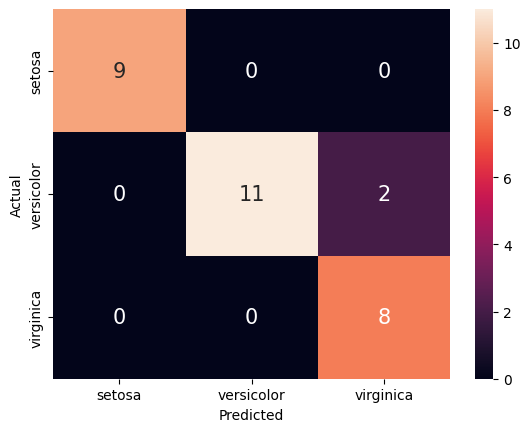

In [29]:
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['setosa', 'versicolor', 'virginica'],
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [30]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.85      0.92        13
   virginica       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



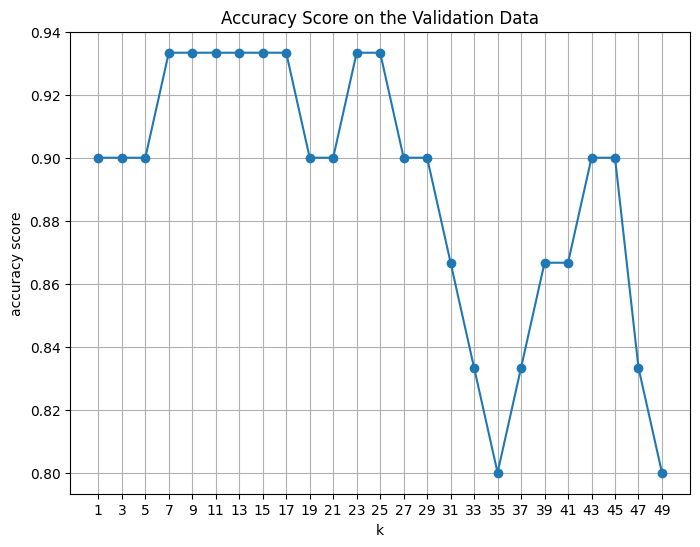

In [31]:
k_values = []
acc_score = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_score.append(accuracy_score(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [32]:
m = max(acc_score)
m

0.9333333333333333

In [33]:
k_values[acc_score.index(m)]

7

In [34]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

## 3) Use GridSearchCV and RandomizedSearchCV to select hyper-parameters

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [36]:
X = df[["sepal_length", "petal_length"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10),
                            X_train,
                            y_train,
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True),
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

array([1.        , 0.875     , 0.83333333, 0.95833333, 0.95833333])

[1.   0.88 0.83 0.96 0.96]
Average accuracy: 0.925
Accuracy standard deviation: 0.06123724356957946


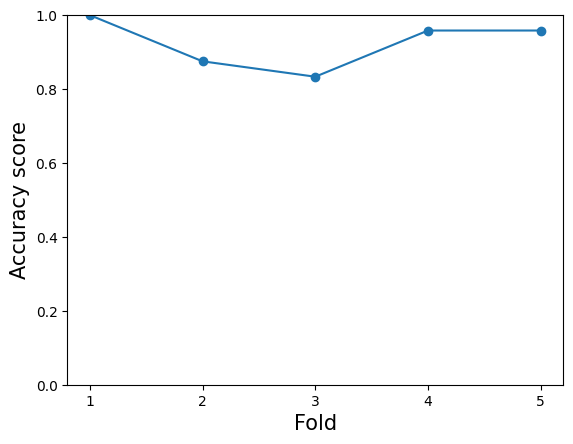

In [38]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());

In [39]:
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.00403547, 0.00370655, 0.0038238 , 0.00318093, 0.00427036,
        0.00364461, 0.00368252, 0.00369358, 0.00374384, 0.00353203,
        0.00476742, 0.00347548, 0.00403872, 0.00375309, 0.00393963,
        0.00369334, 0.00367732, 0.00350523, 0.00381532, 0.00439806,
        0.0040556 , 0.0036262 , 0.00384994, 0.00378261, 0.00379834,
        0.00356956, 0.00331426, 0.00360847, 0.00356603, 0.0035531 ,
        0.00401177, 0.00355105, 0.00377393, 0.00431018, 0.00432754,
        0.00401006, 0.00369816, 0.00365696, 0.00379052, 0.00361657,
        0.00360389, 0.00359335, 0.00358028, 0.00519919, 0.00392137,
        0.00350599, 0.00356793, 0.00347252, 0.00498233, 0.01483574,
        0.01121645, 0.00711036, 0.00667634, 0.00209298, 0.00199227,
        0.0018837 , 0.00204124, 0.0019206 , 0.00199003, 0.00210547,
        0.00270824, 0.00245538, 0.00206051, 0.00263886, 0.00221767,
        0.0020709 , 0.00208731, 0.00195556, 0.00206766, 0.00190673,
        0.00194268, 0.00190334,

In [40]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004035,0.000138,0.007491,0.000159,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.916667,0.916667,0.875000,0.958333,0.916667,0.916667,0.026352,115
1,0.003707,0.000459,0.003877,0.000277,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.916667,0.916667,0.875000,0.958333,0.916667,0.916667,0.026352,115
2,0.003824,0.000081,0.007401,0.000207,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.916667,0.916667,0.875000,0.958333,0.916667,0.916667,0.026352,115
3,0.003181,0.000325,0.003427,0.000206,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.916667,0.916667,0.875000,0.958333,0.916667,0.916667,0.026352,115
4,0.004270,0.001120,0.006981,0.000459,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.916667,0.916667,0.875000,0.958333,0.916667,0.916667,0.026352,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.003020,0.000126,0.103909,0.008233,49,2,distance,"{'n_neighbors': 49, 'p': 2, 'weights': 'distan...",1.000000,0.916667,0.833333,0.958333,0.916667,0.925000,0.055277,76
196,0.006008,0.002815,0.013567,0.003005,50,1,uniform,"{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}",0.916667,0.708333,0.875000,0.916667,0.791667,0.841667,0.080795,192
197,0.007244,0.002513,0.039848,0.004207,50,1,distance,"{'n_neighbors': 50, 'p': 1, 'weights': 'distan...",1.000000,0.875000,0.791667,0.958333,0.875000,0.900000,0.072648,147
198,0.004105,0.001698,0.020436,0.014338,50,2,uniform,"{'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}",0.916667,0.791667,0.875000,0.916667,0.833333,0.866667,0.048591,172


In [41]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]].head(10)

,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
0,1,uniform,1,0.916667,115
1,1,distance,1,0.916667,115
2,1,uniform,2,0.916667,115
3,1,distance,2,0.916667,115
4,2,uniform,1,0.916667,115
5,2,distance,1,0.916667,115
6,2,uniform,2,0.925000,76
7,2,distance,2,0.916667,115
8,3,uniform,1,0.941667,14
9,3,distance,1,0.933333,31


In [42]:
gs.best_score_

0.95

In [43]:
gs.best_params_

{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}

In [44]:
y_pred = gs.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [45]:
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

0.95

In [46]:
rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 10}

In [47]:
y_pred = rs.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

##  4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary


In [48]:
from mlxtend.plotting import plot_decision_regions

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
k=50                # trying k=50
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [52]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


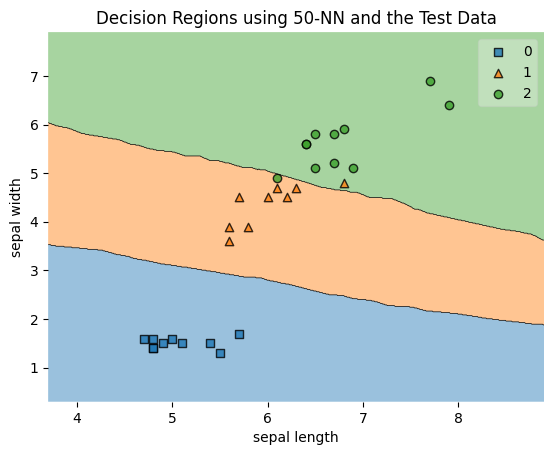

In [53]:
plot_decision_regions(X_test.to_numpy(), y_test, clf = model) # change to test data
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title(f"Decision Regions using {k}-NN and the Test Data");